In [2]:
import librosa
import librosa.display
from spectrogram_class import spectrogram
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from spec_input_generator import gen, gen_eval
import numpy as np

In [16]:
(np.random.randint(0, 2, size=10000) == np.random.randint(0, 2, size=10000)).mean()

0.4995

In [2]:
hop_length = 2048
win_length = 512
n_fft = 1024

(256, 500)
(256, 500) HIT


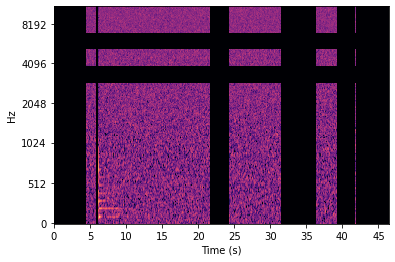

In [3]:
%run spectrogram_class.py

In [4]:
meta_df = pd.read_csv('../data/OrchideaSOL_metadata.csv')

In [5]:
meta_df.sample(1)['Path'].values[0]

'Strings/Viola/ordinario/Va-ord-A4-ff-3c-R100d.wav'

In [6]:
test_spec = spectrogram(meta_df.sample(1)['Path'].values[0])

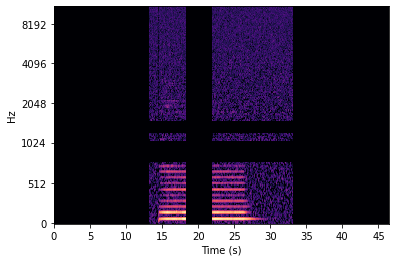

In [7]:
test_spec.plot_spec()

In [8]:
test, _ = librosa.load('../data/_OrchideaSOL2020_release/OrchideaSOL2020/PluckedStrings/Harp/pizzicato_bartok/Hp-pizz_bartok-G3-ff-N-N.wav', 
                    sr = None)

In [9]:
test.shape

(826215,)

In [10]:
def mask_spec(arr, inplace = False):
    loop = random.randint(1, 2)
    tmp = arr.copy()
    for i in range(loop):
        start = random.randint(0, arr.shape[1])
        duration = random.randint(25, 60)
        if inplace == True:
            arr[:, start:start + duration] = 0
        else:
            tmp[:, start:start+duration] = 0
    freq_loop = random.randint(1, 3)
    for freq in range(freq_loop):
        start = random.randint(0, arr.shape[0])
        duration = random.randint(25, 60)
        if inplace == True:
            arr[start:start + duration, :] = 0
        else:
            tmp[start:start + duration, :] = 0

    return None if inplace == True else tmp


In [11]:
# librosa.display.specshow(librosa.amplitude_to_db(mask_spec(spec_sample)), y_axis='log', x_axis = 's')

In [12]:
import random
print(random.randint(0, 9))

7


In [13]:
print(random.randint.__doc__)

Return random integer in range [a, b], including both end points.
        


In [22]:
test, _ = next(gen(meta_df))

In [15]:
np.load('/home/shiya/Documents/Music_transcription_fastai/data/_OrchideaSOL2020_release/OrchideaSOL2020/Strings/Violin/ordinario/Vn-ord-A3-ff-4c-N.npy', 
            allow_pickle=True)

array(<spectrogram_class.spectrogram object at 0x7fd9323f9e50>,
      dtype=object)

In [16]:
0 in test

True

In [17]:
print(test.shape)

(256, 500, 1)


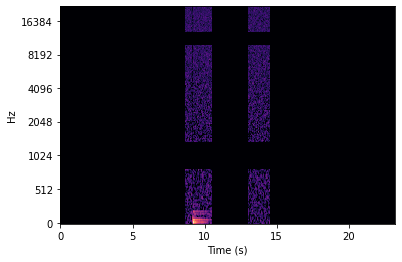

In [18]:
librosa.display.specshow(librosa.amplitude_to_db(np.reshape(test, newshape = test.shape[:2])), x_axis = 's', 
                                                y_axis = 'mel', sr=44100, hop_length=2048, 
                                                n_fft=2048)

In [19]:
sample = meta_df.sample(1)

In [21]:
sample['Path'].values

array(['PluckedStrings/Harp/ordinario/Hp-ord-B2-pp-N-N.wav'], dtype=object)

In [33]:
spec = spectrogram(sample['Path'].values[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] HIT
(256, 428)


In [ ]:
sample['Path']

8462    Strings/Violin/ordinario/Vn-ord-C#4-pp-4c-N.wav
Name: Path, dtype: object

In [29]:
np.save('testnig.npy', spec.spec)

In [30]:
!ls

/bin/bash: /home/shiya/anaconda3/envs/music/lib/libtinfo.so.6: no version information available (required by /bin/bash)
__init__.py			 spectrogram_class.py
model.png			 spectrogram.py
music_transcription_2conv.ipynb  test.ipynb
music_transcription_class.ipynb  testnig.npy
music_transcription.ipynb	 wav_converter_class.py
__pycache__			 wav_converter.py
spec_input_generator.py


In [31]:
load_test = np.load('testnig.npy', allow_pickle = True)

In [32]:
load_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
load_test.shape

()